<a href="https://colab.research.google.com/github/Sudeeksha29/Chronic_Kidney_Disease/blob/main/Project_kidney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 0: Import headerfiles

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

Step 1 : read dataset

step 1.1: read dataset from drive

step 1.2 :copy path of dataset

In [31]:
data = pd.read_csv('kidney_disease.csv')

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


step 2 :Information about the dataset or Exploratory data Analysis

step 2.1:using shape method to find no of rows and columns

In [23]:
data.shape

(400, 26)

step 2.2: using info to print datails of dataset

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

step 2.3: to print top details of dataset info

In [25]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


step 2.4: to print tail and distributions of dataset

In [26]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


step 2.5: to print manipulated outcomes of dataset

In [27]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [32]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']

# Use sparse_output instead of sparse
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity

# Fit and transform the categorical columns
encoded_cols = pd.DataFrame(
    encoder.fit_transform(data[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols)
)

# Concatenate the encoded columns with original data
data = pd.concat([data, encoded_cols], axis=1)

# Drop the original categorical columns
data.drop(categorical_cols, axis=1, inplace=True)

# Check the result
data.head()


,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,dm_nan,cad_no,cad_yes,cad_nan,appet_poor,appet_nan,pe_yes,pe_nan,ane_yes,ane_nan
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [34]:
data

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,dm_nan,cad_no,cad_yes,cad_nan,appet_poor,appet_nan,pe_yes,pe_nan,ane_yes,ane_nan
0,0,48.0,80.0,1.02,1.0,0.0,121.0,36.0,1.2,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7.0,50.0,1.02,4.0,0.0,99.0,18.0,0.8,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,62.0,80.0,1.01,2.0,3.0,423.0,53.0,1.8,135.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,51.0,80.0,1.01,2.0,0.0,106.0,26.0,1.4,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,140.0,49.0,0.5,150.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,397,12.0,80.0,1.02,0.0,0.0,100.0,26.0,0.6,137.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'target_column' is the name of your target variable column
target_column = 'classification'

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
data[target_column] = label_encoder.fit_transform(data[target_column])

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              400 non-null    object
 1   age             400 non-null    object
 2   bp              400 non-null    object
 3   sg              400 non-null    object
 4   al              400 non-null    object
 5   su              400 non-null    object
 6   bgr             400 non-null    object
 7   bu              400 non-null    object
 8   sc              400 non-null    object
 9   sod             400 non-null    object
 10  pot             400 non-null    object
 11  hemo            400 non-null    object
 12  pcv             400 non-null    object
 13  wc              400 non-null    object
 14  rc              400 non-null    object
 15  classification  400 non-null    int64 
 16  rbc_normal      400 non-null    object
 17  rbc_nan         400 non-null    object
 18  pc_normal 

0 indicates --No diabetes
1 indicates--diabetes

step 2.6:

In [37]:
data["dm_yes"].value_counts()

,count
dm_yes,
0.0,266
1.0,134


step 2.7:

In [38]:
data["cad_no"].value_counts()

,count
cad_no,
1.0,362
0.0,38


2.10 : Visualization
step 2.10.1:Graph for Glucose

```

```



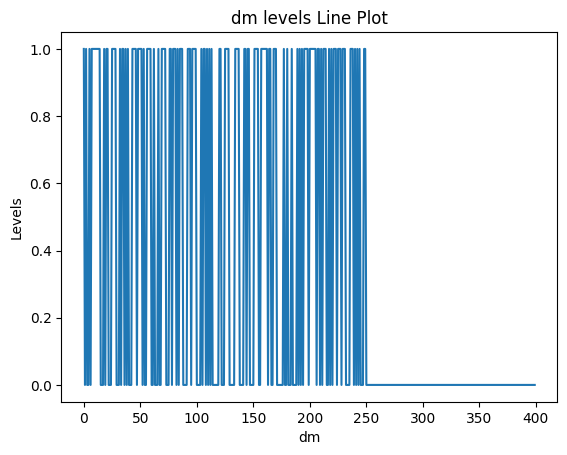

In [39]:
# visualization
plt.plot(data['dm_yes'])
plt.xlabel("dm")
plt.ylabel("Levels")
plt.title("dm levels Line Plot")
plt.show()

2.10.2: Data visualization by graph for outcomes in database

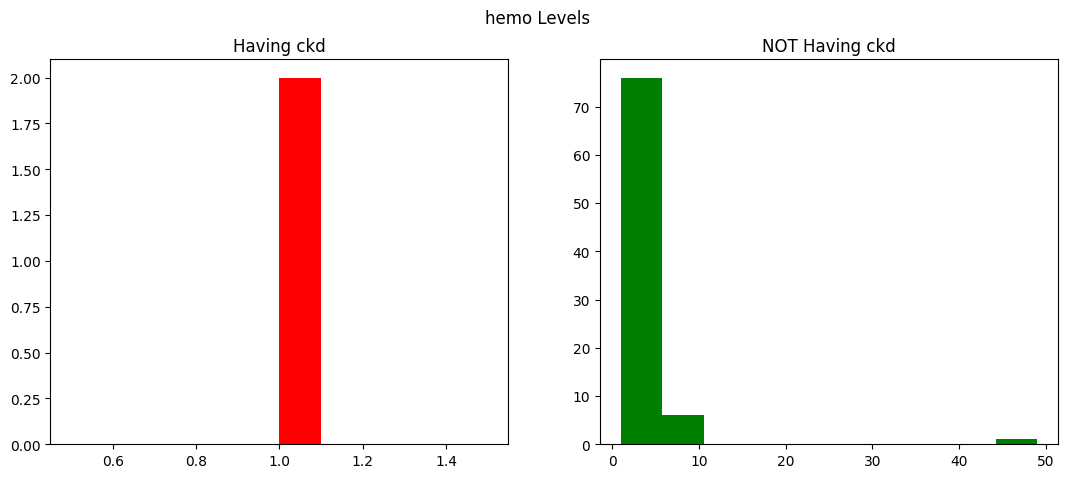

In [40]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
newdataset_len=data[data['classification']==1]['hemo'].value_counts()

ax1.hist(newdataset_len,color='red')
ax1.set_title('Having ckd')

newdataset_len=data[data['classification']==0]['hemo'].value_counts()
ax2.hist(newdataset_len,color='green')
ax2.set_title('NOT Having ckd')

fig.suptitle('hemo Levels')
plt.show()

Step 3: Removal of  duplicates

3.1:Whether duplicates there or not

In [41]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
395,False
396,False
397,False
398,False


step 3.2:To remove if duplicates there

In [42]:
newdataset=data.drop_duplicates()

step 3.3:To print newdataset without duplicates

In [43]:
newdataset

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,dm_nan,cad_no,cad_yes,cad_nan,appet_poor,appet_nan,pe_yes,pe_nan,ane_yes,ane_nan
0,0,48.0,80.0,1.02,1.0,0.0,121.0,36.0,1.2,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7.0,50.0,1.02,4.0,0.0,99.0,18.0,0.8,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,62.0,80.0,1.01,2.0,3.0,423.0,53.0,1.8,135.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,51.0,80.0,1.01,2.0,0.0,106.0,26.0,1.4,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,140.0,49.0,0.5,150.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,397,12.0,80.0,1.02,0.0,0.0,100.0,26.0,0.6,137.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Step 4:  Preprocessing

step 4.1:

In [44]:
data.isnull().sum()

,0
id,0
age,0
bp,0
sg,0
al,0
su,0
bgr,0
bu,0
sc,0
sod,0


Step 6: Train-Test Split


STEP 7:Import necessary libraries for model training and evaluation

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Step 8:split into train and test in the ration 70:30

In [46]:


# Assuming 'target_column' is the name of your target variable
X_train, X_test, y_train, y_test = train_test_split(data, data['classification'], test_size=0.2, random_state=42)

In [47]:
data


,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,dm_nan,cad_no,cad_yes,cad_nan,appet_poor,appet_nan,pe_yes,pe_nan,ane_yes,ane_nan
0,0,48.0,80.0,1.02,1.0,0.0,121.0,36.0,1.2,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7.0,50.0,1.02,4.0,0.0,99.0,18.0,0.8,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,62.0,80.0,1.01,2.0,3.0,423.0,53.0,1.8,135.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,51.0,80.0,1.01,2.0,0.0,106.0,26.0,1.4,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,140.0,49.0,0.5,150.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,397,12.0,80.0,1.02,0.0,0.0,100.0,26.0,0.6,137.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
import pandas as pd

# Assuming 'df' is your DataFrame
feature_names = data.columns.tolist()

In [49]:
feature_names

['id',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'classification',
 'rbc_normal',
 'rbc_nan',
 'pc_normal',
 'pc_nan',
 'pcc_present',
 'pcc_nan',
 'ba_present',
 'ba_nan',
 'htn_yes',
 'htn_nan',
 'dm_\tyes',
 'dm_ yes',
 'dm_no',
 'dm_yes',
 'dm_nan',
 'cad_no',
 'cad_yes',
 'cad_nan',
 'appet_poor',
 'appet_nan',
 'pe_yes',
 'pe_nan',
 'ane_yes',
 'ane_nan']

In [50]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

# Assuming 'classification' is a variable containing the target column name
classification = 'classification'  # Replace with your actual target column name

# Select features (X) and target variable (y)
feature_columns = ['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'pcc_present', 'pcc_nan', 'rbc_normal', 'rbc_nan', 'pc_normal', 'pc_nan', 'ba_present', 'ba_nan', 'htn_yes', 'dm_\tyes', 'dm_ yes', 'dm_no', 'dm_yes', 'cad_no', 'cad_yes', 'appet_poor', 'pe_yes', 'ane_yes']
X = data[feature_columns]
y = data[classification]

# Replace '\t?' with NaN
X.replace('\t?', np.nan, inplace=True)

# Convert columns to numeric (assuming that they are numeric features)

X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(train_X, train_Y)

# Make predictions on the test set
predictions = model.predict(test_X)


# Evaluate the model
accuracy = metrics.accuracy_score(predictions, test_Y)
print('The accuracy of the Logistic Regression model is:', accuracy)

# Display the classification report
report = classification_report(test_Y, predictions)
print("Classification Report:\n", report)

The accuracy of the Logistic Regression model is: 0.9875
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           2       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



Step 9: Model Training (Logistic Regression)


Step 10: Display Logistic Regression results


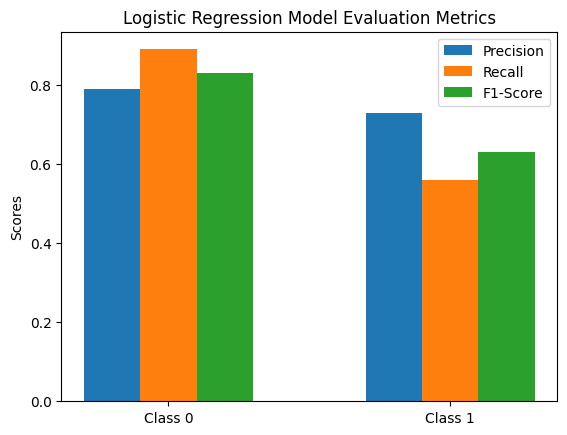

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these values with your actual scores
precision = [0.79, 0.73]
recall = [0.89, 0.56]
f1_score = [0.83, 0.63]

labels = ['Class 0', 'Class 1']

# Plotting the bar chart
width = 0.2
x = np.arange(len(labels))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Adding labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Logistic Regression Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()

